# Assignments - Digital options

Create a new folder under <b>QuantCourseBP\homeworks</b> and copy over the content of this lecture's solution folder to start with.

1. Get familiar with digital options and implement EuropeanDigitalContract and EuropeanDigitalAnalyticPricer (fair value and greeks) in the library. Implement unit test for fair value using pytest. **(12 points)**
2. Get familiar with bull spread options and by utilizing EuropeanDigitalAnalyticPricer and EuropeanAnalyticPricer, create a figure to visualize that a digital call option can be thought of as a limit of bull spread call options. **(8 points)**

In [31]:
# Add current folder and QuantCourseBP folder to syspath to import modules
import sys
from pathlib import Path
current = Path(Path().resolve())
sys.path.append(str(current))
sys.path.append(str(current.parents[2]))

from enum import *
from pricer import *
from test_pricer import *


import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Sample trade, testing

In [11]:
marketmodel=MarketModel("BLUECHIP_BANK")
trade=EuropeanDigitalContract("BLUECHIP_BANK", "CALL", "LONG", 80, 0.5)
emptyparams=Params()
pricer=EuropeanDigitalAnalyticPricer(trade, marketmodel, emptyparams)

In [6]:
trade.get_timeline()

[0.5]

In [7]:
trade.payoff({0.2: 50, 0.4:55, 0.5: 100, 0.9:120})

1.0

In [8]:
trade.payoff({0.2: 50, 0.4:55, 0.5: 70, 0.9:120})

0.0

In [9]:
pricer.calc_fair_value()

0.9374915931661664

In [12]:
pricer.calc_theta()

0.19838572198201357

In [13]:
!pytest test_pricer.py

============================= test session starts =============================
platform win32 -- Python 3.10.11, pytest-7.4.2, pluggy-1.5.0
rootdir: C:\Users\takac\QuantCourseBP\homeworks\LDXI4IN\BuildingALibrary
plugins: anyio-4.8.0
collected 48 items

test_pricer.py ................................................          [100%]

============================= 48 passed in 0.80s ==============================


Bull spread

In [24]:
# calculating price for scaled bull spread option (using two calls)
def scaled_bullspread_price(underlying, strike, eps, expiry):
    trade1=EuropeanContract(underlying, "CALL", "LONG", strike, expiry)
    trade2=EuropeanContract(underlying, "CALL", "SHORT", strike+eps, expiry)
    quantity=1/eps # so that the difference in payoff between both option/none is ITM is exactly 1
    price1=EuropeanAnalyticPricer(trade1, marketmodel, emptyparams).calc_fair_value()
    price2=EuropeanAnalyticPricer(trade2, marketmodel, emptyparams).calc_fair_value()
    return (price1+price2)*quantity

In [56]:
# example data
underlying="BLUECHIP_BANK"
strike=120
expiry=0.5

marketmodel=MarketModel(underlying)
emptyparams=Params()

In [57]:
digital=EuropeanDigitalContract(underlying, "CALL", "LONG", strike, expiry)
digitalprice=EuropeanDigitalAnalyticPricer(digital, marketmodel, emptyparams).calc_fair_value()

In [58]:
eps=np.linspace(1, 0.01, 30)
series=[scaled_bullspread_price(underlying, strike, i, expiry) for i in eps]

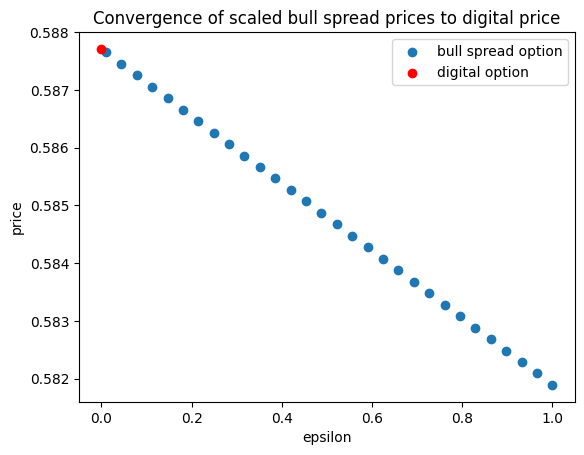

In [59]:
plt.scatter(eps, series, label="bull spread option")
plt.scatter([0], [digitalprice], color="red", label="digital option")
plt.xlabel("epsilon")
plt.ylabel("price")
plt.title("Convergence of scaled bull spread prices to digital price")
plt.legend()